# Stock Visualization

In [1]:
# imports
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plot


# class to visualize stock price via graphs
class Visualize_Stocks:
    
    # initialize parameters
    def __init__(self, stock_one, file_path_one, desired_variable, time_period,
                 stock_two = None, file_path_two = None, result_file_path = None, 
                 days_per_average = 7):
        self._stock_one = stock_one
        self._file_path_one = file_path_one
        self._desired_variable = desired_variable
        self._time_period = time_period
        self._stock_two = stock_two
        self._file_path_two = file_path_two
        self._result_file_path = result_file_path
        self._isTwoStocks = False
        self._days_per_average = days_per_average
        
        # see if there are two stocks given to plot
        if (file_path_two != None) and (stock_two != None):
            self._isTwoStocks = True
            
    
    # main method
    def main(self):
        # create paths for both images
        if self._result_file_path != None:
            path = self._result_file_path
        else:
            curr = datetime.now()
            year = curr.strftime("%Y")
            month = curr.strftime("%m")
            day = curr.strftime("%d")
            hour = curr.strftime("%H")
            minute = curr.strftime("%M")
            second = curr.strftime("%S")
            dateString = year + month + day + '_' + hour + minute + second
            
            folder = self._file_path_one.rsplit('/', 1)[0]
            path = folder + '/visualization_' + dateString + '.jpg'
            
        splitPath = path.rsplit('.')
        pathWoExt = splitPath[0]
        pricePlotPath = pathWoExt + '_price.' + splitPath[1]
        movingPlotPath = pathWoExt + '_moving.' + splitPath[1]
        
        
        # if one stock input
        if self._isTwoStocks == False:
            data = pd.read_csv(self._file_path_one, usecols = ['Date', self._desired_variable])
            pricePlot = self._graph_one_stock(data, self._stock_one, self._file_path_one, self._desired_variable, self._time_period)
            pricePlot.savefig(pricePlotPath, bbox_inches='tight')
            movingPlot = self._one_graph_moving_average(data, self._desired_variable, self._days_per_average)
            movingPlot.savefig(movingPlotPath, bbox_inches='tight')
        else:
            data = pd.read_csv(self._file_path_one, usecols = ['Date', desiredVar])
            data['stockTwoVals'] = pd.read_csv(self._file_path_two, usecols = [desiredVar])
            pricePlot = self._graph_two_stocks(data, self._stock_one, self._file_path_one, 
                                               self._desired_variable, self._time_period,
                                               self._stock_two, self._file_path_two)
            pricePlot.savefig(pricePlotPath, bbox_inches='tight')
            movingPlot = self._two_graph_moving_average(data, self._desired_variable, self._days_per_average)
            movingPlot.savefig(movingPlotPath, bbox_inches='tight')
        
     
    
    ###########################################################################
    #####
    ##### method to graph one stock price
    ##### 
    ##### @param data - the dataframe of data
    ##### @param stock - the stock symbol
    ##### @param path - the path to the stock price data
    ##### @param variable - the variable to look at in the data [ex. 'Close']
    ##### @param period - the time period of the data
    #####
    ###########################################################################
    def _graph_one_stock(self, data, stock, path, variable, period):
        # read data
        data = pd.read_csv(path, usecols = ['Date', desiredVar])
        
        # get key variable values
        yLabel = variable + ' Price'
        beginPrice = data[variable][0]
        closePrice = data[desiredVar][len(data) - 1]
        averagePrice = data[variable].mean()
        minPriceY = min(data[variable])
        maxPriceY = max(data[variable])
        
        # find min and max indices
        for index in range(len(data)):
            minIndexFound = False
            maxIndexFound = False
            if data[variable][index] == minPriceY:
                minPriceX = index
                minPriceDate = data['Date'][index]
                minIndexFound = True
            if data[variable][index] == maxPriceY:
                maxPriceX = index
                maxPriceDate = data['Date'][index]
                maxIndexFound = True
            if (minIndexFound == True) and (maxIndexFound == True):
                break
        
        # plot points    
        data.plot(kind = 'line', 
                      x = 'Date', 
                      y = variable, 
                      color = 'blue',
                      title = '{0} Price for Last {1}'.format(stock, period),
                      xlabel = 'Date', 
                      ylabel = yLabel,
                      legend = False)

        # plot beginning price line
        plot.axhline(y = beginPrice, 
                     color = 'orange', 
                     linestyle = 'dotted',
                     label = 'Open Price: {0}'.format(round(beginPrice, 2)))
        
        # plot close price line
        plot.axhline(y = closePrice, 
                     linestyle = 'none',
                     label = 'Close Price: {0}'.format(round(closePrice, 2)))

        # plot average price line
        plot.axhline(y = averagePrice, 
                     linestyle = 'none',
                     label = 'Average Price: {0}'.format(round(averagePrice, 2)))

        # plot points for max and min prricees
        plot.plot(maxPriceX, maxPriceY, color = 'green', marker=".", markersize = 15, label = 'Max Price: {0} [{1}]'.format(round(maxPriceY, 2), maxPriceDate))
        plot.plot(minPriceX, minPriceY, color = 'red', marker=".", markersize = 15, label = 'Min Price: {0} [{1}]'.format(round(minPriceY, 2), minPriceDate))

        plot.legend(bbox_to_anchor = (1, 1))
        
        return plot
    
    
    ###########################################################################
    #####
    ##### method to graph one stock moving average
    ##### 
    ##### @param data - the dataframe of data
    ##### @param variable - the variable to look at in the data [ex. 'Close']
    ##### @param daysPerAverage - the amount of days in the moving average
    #####
    ###########################################################################
    def _one_graph_moving_average(self, data, variable, daysPerAverage):    
        count = 0
        moving = []
        averages = []

        # create array of moving average values
        for val in data[variable]:
            if count != daysPerAverage:
                moving.append(val)
                averages.append(None)
                count += 1
            else:
                avg = np.mean(moving)
                averages.append(avg)
                del moving[0]
                moving.append(val)

        # add column to dataframe
        data['Moving Average for {0} Days'.format(daysPerAverage)] = averages    

        data.plot(x = 'Date', 
                  y = [desiredVar, 'Moving Average for {0} Days'.format(daysPerAverage)])

        plot.title('{0} Price and {1} Day Moving Average'.format(desiredVar, daysPerAverage))
        plot.xlabel('Date')
        plot.ylabel(desiredVar + ' Price')

        return plot
        
        
    ################################################################################
    #####
    ##### method to graph two stocks
    ##### 
    ##### @param stockOne - the stock symbol of the first stock
    ##### @param pathOne - the path to the stock price data of the first stock
    ##### @param variable - the variable to look at in the data [ex. 'Close']
    ##### @param period - the time period of the data
    ##### @param stockTwo - the stock symbol of the second stock
    ##### @param pathTwo - the path to the stock price data of the second stock
    #####
    ################################################################################
    def _graph_two_stocks(self, data, stockOne, pathOne, variable, period, stockTwo, pathTwo):
        # read data
        #data = pd.read_csv(pathOne, usecols = ['Date', desiredVar])
        #data['stockTwoVals'] = pd.read_csv(pathTwo, usecols = [desiredVar])
        
        # get key variable values
        closePriceOne = data[desiredVar][len(data) - 1]
        closePriceTwo = data['stockTwoVals'][len(data) - 1]
        avgPriceOne = data[desiredVar].mean()
        avgPriceTwo = data['stockTwoVals'].mean()
        

        # determine colors of stock lines
        colors = ['red', 'green']
        if closePriceOne > closePriceTwo:
            colors = ['green', 'red']

        # plot the data
        data.plot(x = 'Date', 
                  y = [desiredVar, 'stockTwoVals'],
                  label = [stockOne, stockTwo],
                  color = colors)

        plot.title('{0} Price for Last {1}: {2} v. {3}'.format(desiredVar, timePeriod, stockOne, stockTwo))
        plot.xlabel('Date')
        plot.ylabel(desiredVar + ' Price')

        # plot close price line [one]
        plot.axhline(y = closePriceOne, 
                     linestyle = 'dotted',
                     color = colors[0],
                     label = 'Close Price {0}: {1}'.format(stockOne, round(closePriceOne, 2)))

        # plot close price line [two]
        plot.axhline(y = closePriceTwo, 
                     linestyle = 'dotted',
                     color = colors[1],
                     label = 'Close Price {0}: {1}'.format(stockTwo, round(closePriceTwo, 2)))
        
        # plot average price line [one]
        plot.axhline(y = avgPriceOne, 
                     linestyle = 'none',
                     label = 'Average Price {0}: {1}'.format(stockOne, round(avgPriceOne, 2)))
        
        # plot average price line [two]
        plot.axhline(y = avgPriceTwo, 
                     linestyle = 'none',
                     label = 'Average Price {0}: {1}'.format(stockTwo, round(avgPriceTwo, 2)))

        plot.legend(bbox_to_anchor = (1, 1))
        
        return plot
    
    
    ###########################################################################
    #####
    ##### method to graph one stock moving average
    ##### 
    ##### @param data - the dataframe of data
    ##### @param variable - the variable to look at in the data [ex. 'Close']
    ##### @param daysPerAverage - the amount of days in the moving average
    #####
    ###########################################################################
    def _two_graph_moving_average(self, data, variable, daysPerAverage):
        count = 0
        movingOne = []
        movingTwo = []
        averagesOne = []
        averagesTwo = []

        # create array of moving average values
        for index in range(len(data)):
            stockOneVal = data[desiredVar][index]
            stockTwoVal = data['stockTwoVals'][index]
            if count != daysPerAverage:
                movingOne.append(stockOneVal)
                movingTwo.append(stockTwoVal)
                averagesOne.append(None)
                averagesTwo.append(None)
                count += 1
            else:
                avgOne = np.mean(movingOne)
                avgTwo = np.mean(movingTwo)
                averagesOne.append(avgOne)
                averagesTwo.append(avgTwo)
                del movingOne[0]
                del movingTwo[0]
                movingOne.append(stockOneVal)
                movingTwo.append(stockTwoVal)

        # add column to dataframe
        data['Moving Average for {0} Days {1}'.format(daysPerAverage, self._stock_one)] = averagesOne
        data['Moving Average for {0} Days {1}'.format(daysPerAverage, self._stock_two)] = averagesTwo

        data.plot(x = 'Date', 
                  y = ['Moving Average for {0} Days {1}'.format(daysPerAverage, self._stock_one), 
                       'Moving Average for {0} Days {1}'.format(daysPerAverage, self._stock_two)])

        plot.title('{0} Day Moving Average'.format(daysPerAverage))
        plot.xlabel('Date')
        plot.ylabel(desiredVar + ' Price')

        return plot

### One Stock

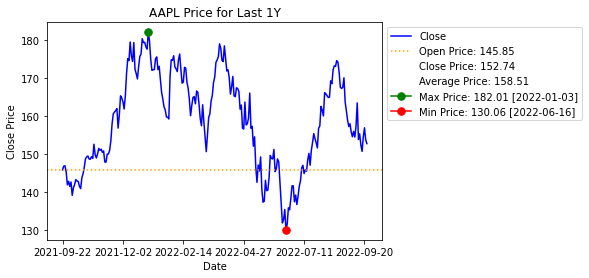

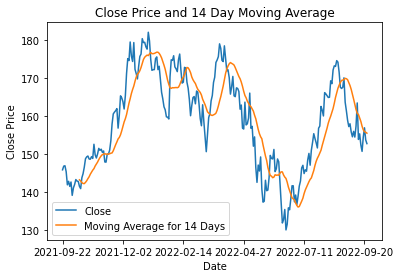

In [12]:
path = '/Users/mtjen/Desktop/395/AAPL.csv'
stockSymbol = 'AAPL'
timePeriod = '1Y'
desiredVar = 'Close'
daysPerAverage = 14

vizTest = Visualize_Stocks(stockSymbol, path, desiredVar, timePeriod, days_per_average = daysPerAverage)
vizTest.main()

### Two Stocks

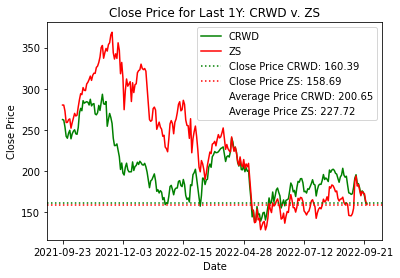

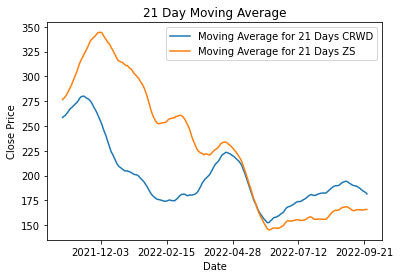

In [2]:
path = '/Users/mtjen/Desktop/395/CRWD.csv'
stockSymbol = 'CRWD'
timePeriod = '1Y'
desiredVar = 'Close'
pathTwo = '/Users/mtjen/Desktop/395/ZS.csv'
stockSymbolTwo = 'ZS'
daysPerAverage = 21

vizTwo = Visualize_Stocks(stockSymbol, path, desiredVar, timePeriod, stockSymbolTwo, 
                          pathTwo, days_per_average = daysPerAverage)
vizTwo.main()

# Census Data Lookup

### Get Categories and Subcategories

In [14]:
import numpy as np
import pandas as pd

class Get_Categories:
    
    def __init__(self, excel_file_path, sheet_number):
        self._excel_file_path = excel_file_path
        self._sheet_number = sheet_number
        
        
    def main(self):
        sheet = self.read_table()
        
        title = self.get_title(sheet)

        # get categories and indices
        res = self.get_categories(sheet)
        indices = res[0]
        categories = res[1]

        # get start stop indices
        indexRes = self.get_category_start_stop_indices(sheet, indices)

        # get subcategories
        subcats = self.get_subcategories(sheet, indexRes)

        # get category pairings
        pairRes = self.get_category_pairs(categories, subcats)

        # get sheet categories
        sheetCategories = [title, pairRes]

        return sheetCategories
        
        
    def read_table(self):
        sheet = pd.read_excel(self._excel_file_path, sheet_name = self._sheet_number)
        return sheet
        
    def get_title(self, sheet):
        title = sheet.iloc[0, 0]
        return title
    
    def get_categories(self, sheet):
        catIndices = []
        categories = []

        for rowIndex in range(len(sheet.columns)):
            value = str(sheet.iloc[1, rowIndex])
            if value != 'nan' and value != 'Characteristic':
                catIndices.append(rowIndex)
                categories.append(value)

        return([catIndices, categories])
    
    def get_category_start_stop_indices(self, sheet, category_indices):
        startStop = []

        for index in range(len(category_indices)):
            startIndex = category_indices[index]
            if index != len(category_indices) - 1:
                stopIndex = category_indices[index + 1]
            else:
                stopIndex = len(sheet.columns) - 1

            startStopIndices = [startIndex, stopIndex]
            startStop.append(startStopIndices)

        return startStop
    
    def get_subcategories(self, sheet, category_start_stop_indices):
        subCategories = []

        for indices in category_start_stop_indices:
            start = indices[0]
            stop = indices[1]
            subCats = sheet.iloc[2, start:stop].values.tolist()
            subCategories.append(subCats)

        return subCategories
    
    def get_category_pairs(self, categories, subcategories):
        categoryPairs = []

        for index in range(len(categories)):
            cat = categories[index]
            subCats = subcategories[index]
            pairing = [cat, subCats]
            categoryPairs.append(pairing)

        # first is main category, second is the subcategories
        return categoryPairs

### Get categories for debt table

In [15]:
path = '/Users/mtjen/desktop/table_data/debt/2015.xlsx'
sheetIndex = 1

catTestOne = Get_Categories(path, sheetIndex)
catTestOne.main()

['Table 2. Percent Holding Debt for Households, by Type of Debt and Selected Characteristics: 2015',
 [['Number of Households (thousands)', [nan]],
  ['Any Debt', ['Total Debt']],
  ['Secured Debt', ['Total', 'Home Debt', 'Business Debt', 'Vehicle Debt']],
  ['Unsecured Debt', ['Total', 'Credit Card Debt', 'Student Loans']]]]

### Get categories for wealth table

In [16]:
path = '/Users/mtjen/desktop/table_data/wealth/2018.xlsx'
sheetIndex = 3

catTestTwo = Get_Categories(path, sheetIndex)
catTestTwo.main()

['Table 4. Percent Distribution of Household Net Worth, by Amount of Net Worth and Selected Characteristics: 2018',
 [['Number of Households (thousands)', [nan]],
  ['Household Net Worth',
   ['Zero or Negative',
    '$1 to $4,999',
    '$5,000 to $9,999',
    '$10,000 to $24,999',
    '$25,000 to $49,999',
    '$50,000 to $99,999',
    '$100,000 to $249,999',
    '$250,000 to $499,999']]]]

### Visualize Census Data

In [3]:
# imports
import argparse
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
from datetime import datetime


# class to visualize census data via graphs
class Visualize_Census:

    # initialize parameters
    def __init__(self, data_folder_path, is_wealth, table_number, category, sub_category,
                     group, sub_group):
        self._data_folder_path = data_folder_path
        self._is_wealth = is_wealth
        self._table_number = table_number
        self._category = category
        self._sub_category = sub_category
        self._group = group
        self._sub_group = sub_group
        self._years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
        
        
    # main method
    def main(self):
        curr = datetime.now()
        year = curr.strftime("%Y")
        month = curr.strftime("%m")
        day = curr.strftime("%d")
        hour = curr.strftime("%H")
        minute = curr.strftime("%M")
        second = curr.strftime("%S")
        dateString = year + month + day + '_' + hour + minute + second
        outputPath = self._data_folder_path + 'census_viz_' + dateString + '.jpg'
        
        plot = self._graph()
        plot.savefig(outputPath)
            
        
    
    ###########################################################################
    #####
    ##### method to create a dataframe for excel table
    ##### 
    ##### @param year - the data year
    #####
    ###########################################################################
    def _create_dataframe(self, year):
        year = str(year)
        dataLocation = self._data_folder_path
        
        if self._is_wealth == True:
            dataLocation += 'wealth/'
        else:
            dataLocation += 'debt/'
        filePath = dataLocation + year + '.xlsx'
        
        sheet = pd.read_excel(filePath, 
                      header = [2, 3],
                      index_col = [0],
                      sheet_name = self._table_number)
        
        return sheet
    
    
    ###########################################################################
    #####
    ##### method to get desired value for the data year
    ##### 
    ##### @param sheet - the excel sheet
    #####
    ###########################################################################
    def _get_value(self, sheet):
        value = sheet[self._category][self._sub_category][self._sub_group]
        return value
    
    
    ###########################################################################
    #####
    ##### method to create data to be used for graph
    #####
    ###########################################################################
    def _generate_data(self):
        dataVals = []
        
        for year in self._years:
            sheet = self._create_dataframe(year)
            value = self._get_value(sheet)
            dataVals.append(value)
            
        return dataVals
    
    
    ###########################################################################
    #####
    ##### method to create graph
    #####
    ###########################################################################
    def _graph(self):
        dataValues = self._generate_data()
        
        wealthOrDebt = 'Wealth'
        if self._is_wealth == False:
            wealthOrDebt = 'Debt'
        
        title = '{0} from 2013-2020\n Category: {1} - {2}\n Group: {3}'.format(
            wealthOrDebt, self._category, self._sub_category, self._sub_group)
        
        fig, ax = plot.subplots()
        ax.set_xlabel('Year')
        ax.set_ylabel('Value')
        ax.set_title(title)
        barVals = ax.bar(self._years, dataValues)
        ax.bar_label(barVals)
        plot.tight_layout()
        
        return plot

'''
    
if __name__ == '__main__':
    descrip = 'visualize census data'
    arguments = argparse.ArgumentParser(description = descrip)

    arguments.add_argument('-p',
                           '--data_folder_path',
                           action='store',
                           type=str,
                           required=True,
                           help='file path of data')
    arguments.add_argument('-w',
                           '--is_wealth',
                           action='store',
                           type=bool,
                           required=False,
                           default=True,
                           help='set False if looking for debt [default = True]')
    arguments.add_argument('-t',
                           '--table_number',
                           action='store',
                           type=int,
                           required=True,
                           help='table index')
    arguments.add_argument('-c',
                           '--category',
                           action='store',
                           type=str,
                           required=True,
                           help='the category for data')
    arguments.add_argument('-s_c',
                           '--sub_category',
                           action='store',
                           type=str,
                           required=True,
                           help='the subcategory for data')
    arguments.add_argument('-g',
                           '--group',
                           action='store',
                           type=str,
                           required=True,
                           help='the group for data')
    arguments.add_argument('-s_g',
                           '--sub_group',
                           action='store',
                           type=str,
                           required=True,
                           help='the subgroup for data')

    parsed = arguments.parse_args()
    variables = vars(parsed)

    path = variables['data_folder_path']
    wealth = variables['is_wealth']
    table = variables['table_number']
    cat = variables['category']
    subCat = variables['sub_category']
    group = variables['group']
    subGroup = variables['sub_group']

    Visualize_Census(path, wealth, table, cat, subCat, group, subGroup).main()
    
'''

"\n    \nif __name__ == '__main__':\n    descrip = 'visualize census data'\n    arguments = argparse.ArgumentParser(description = descrip)\n\n    arguments.add_argument('-p',\n                           '--data_folder_path',\n                           action='store',\n                           type=str,\n                           required=True,\n                           help='file path of data')\n    arguments.add_argument('-w',\n                           '--is_wealth',\n                           action='store',\n                           type=bool,\n                           required=False,\n                           default=True,\n                           help='set False if looking for debt [default = True]')\n    arguments.add_argument('-t',\n                           '--table_number',\n                           action='store',\n                           type=int,\n                           required=True,\n                           help='table index')\n    arguments

### Visualize Wealth

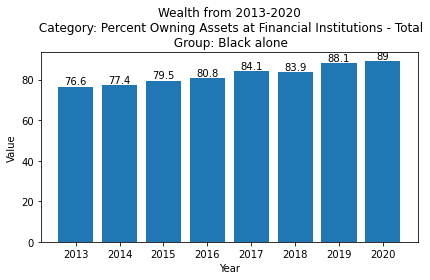

In [4]:
dataLocation = '/Users/mtjen/desktop/table_data/'
isWealth = True
table = 2
category = 'Percent Owning Assets at Financial Institutions'
subCat = 'Total'
group = 'Race'
subGroup = 'Black alone'

testOne = Visualize_Census(dataLocation, isWealth, table, category, subCat, group, subGroup)
testOne.main()

### Visualize Debt

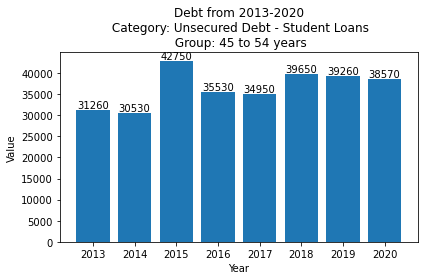

In [5]:
dataLocation = '/Users/mtjen/desktop/table_data/'
isWealth = False
table = 3
category = 'Unsecured Debt'
subCat = 'Student Loans'
group = 'Age of Householder'
subGroup = '45 to 54 years'

testTwo = Visualize_Census(dataLocation, isWealth, table, category, subCat, group, subGroup)
testTwo.main()